<a href="https://colab.research.google.com/github/Arshadpd/CovidTracker/blob/main/A1_template_2024_executed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are:

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-2-e3eb9ea30912>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page.

The data is stored in a CSV (comma separated values) file and contains the following information

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


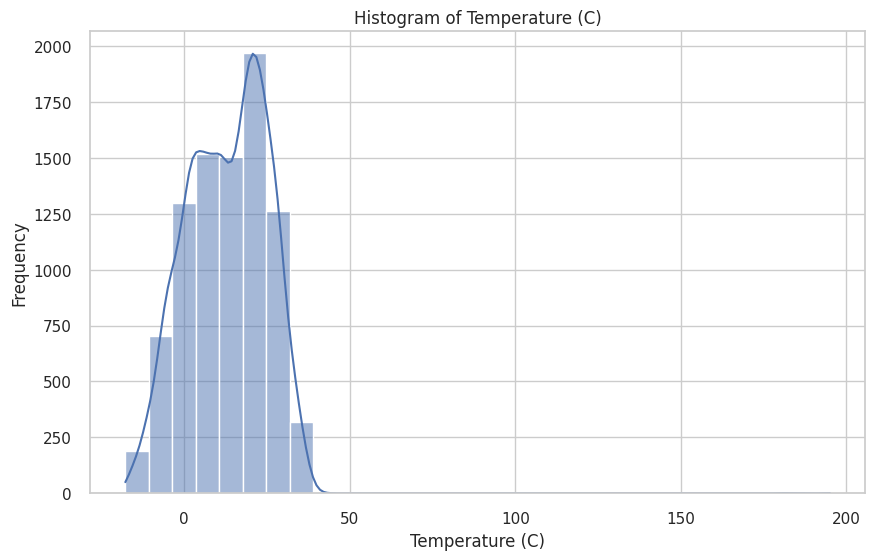

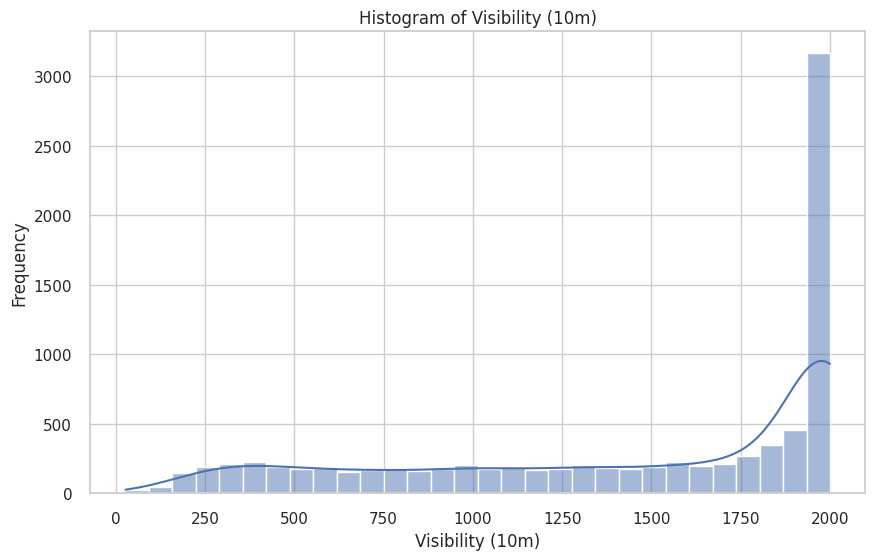

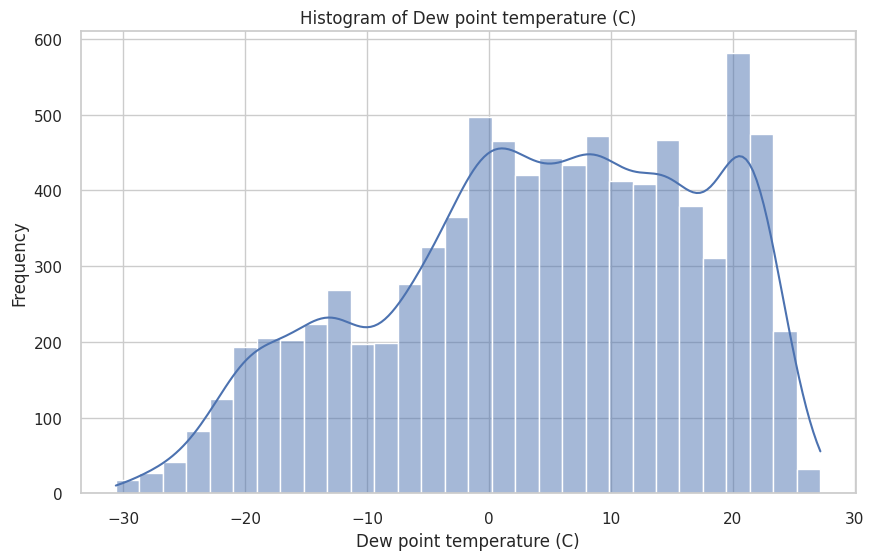

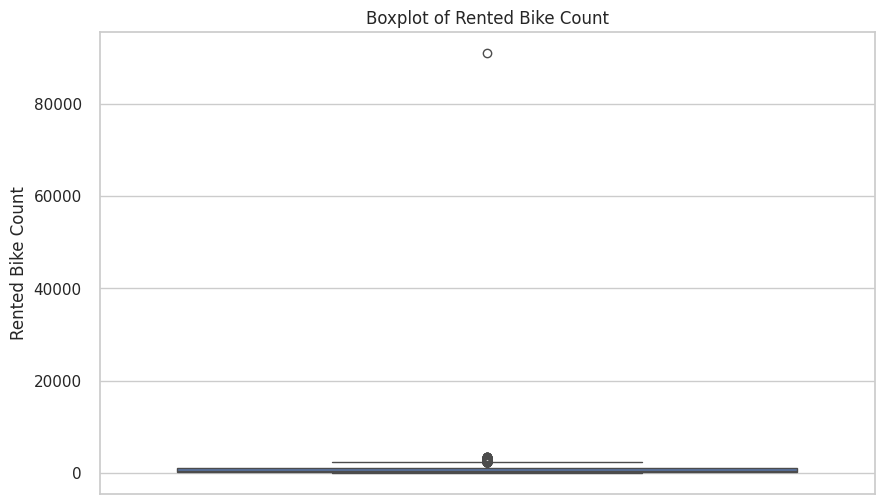

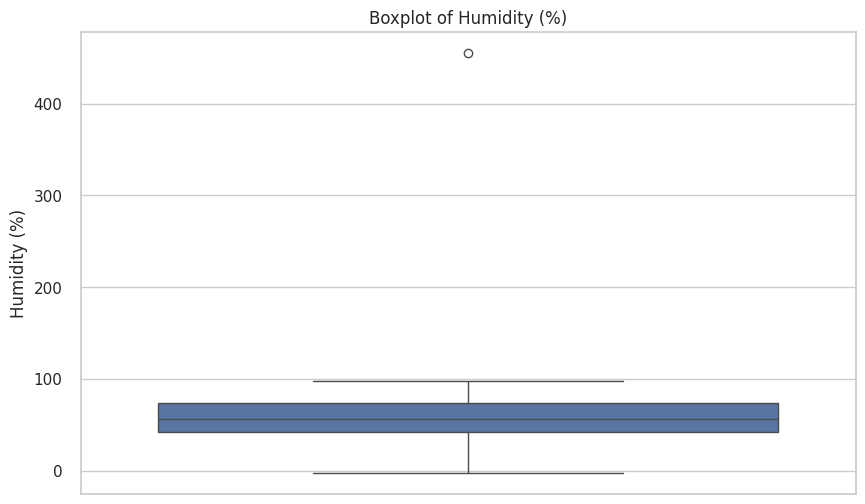

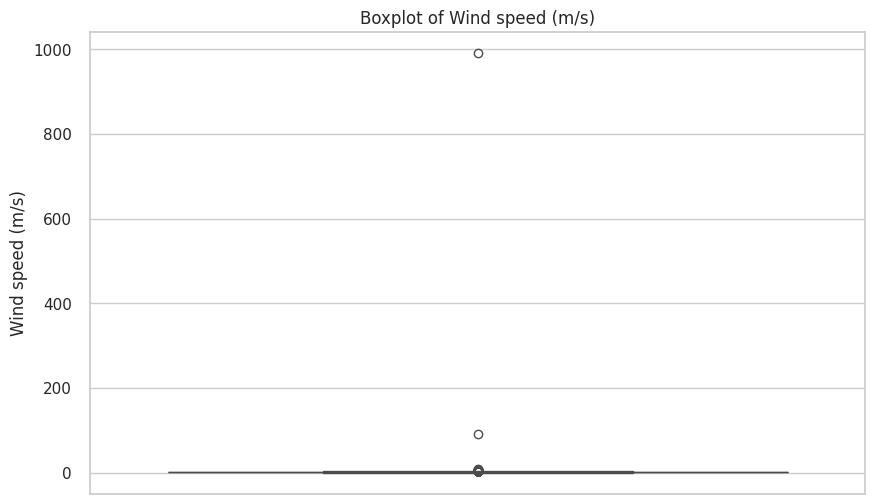

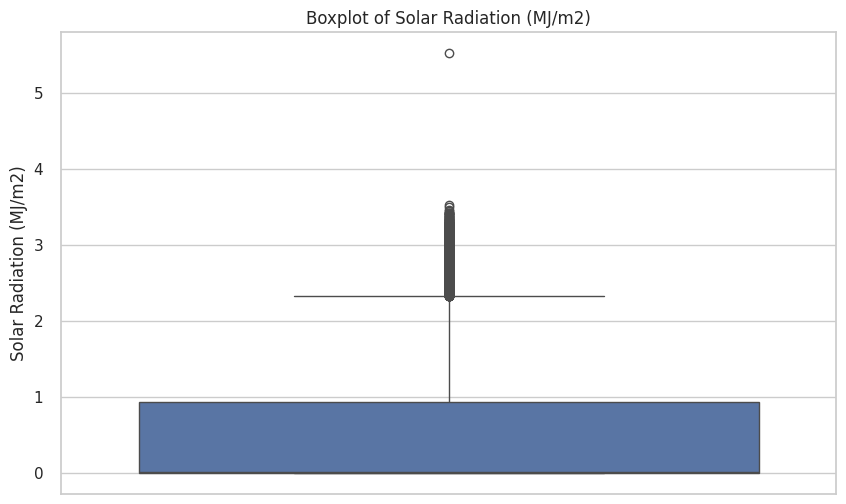

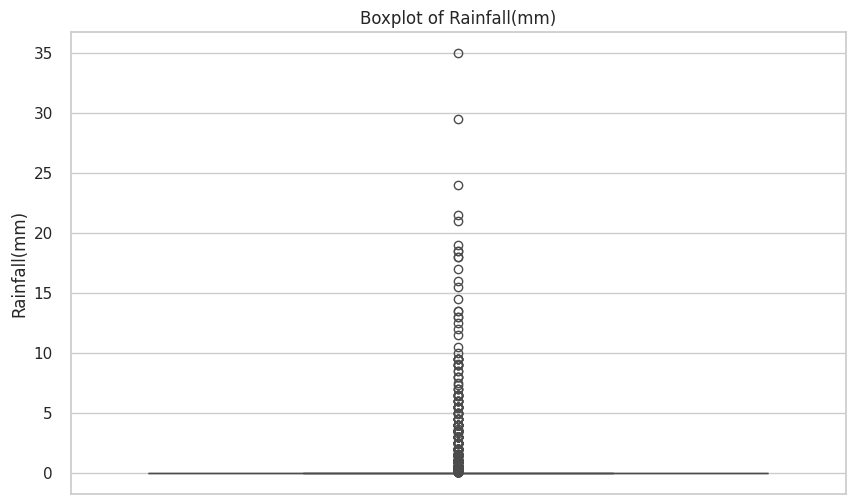

<ipython-input-3-9b144583229d>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=snowfall_binary, palette="viridis")


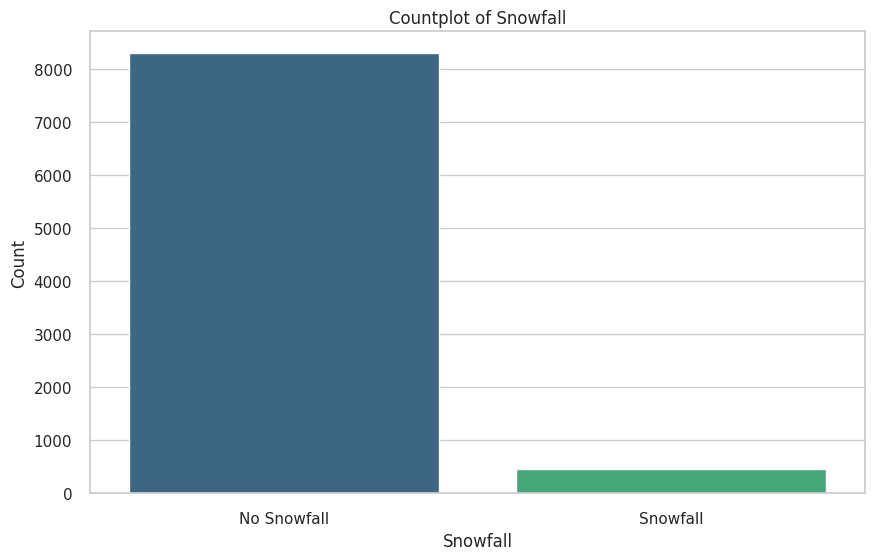

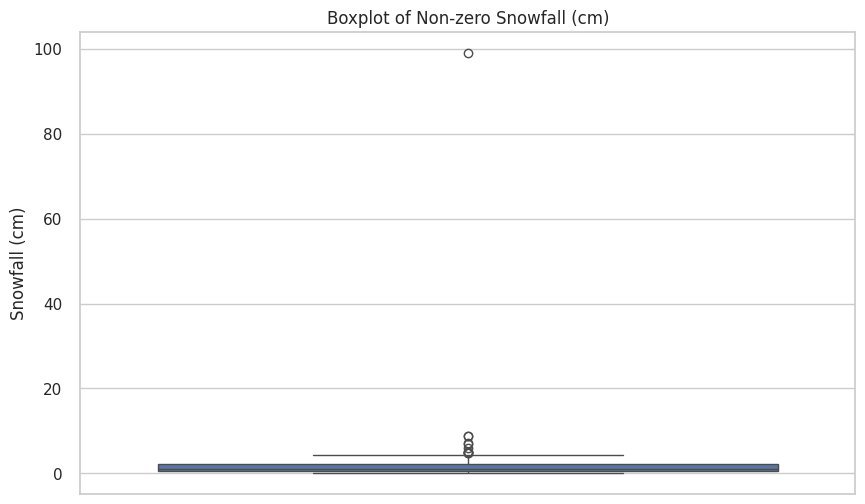

<ipython-input-3-9b144583229d>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_rentals, palette="viridis")


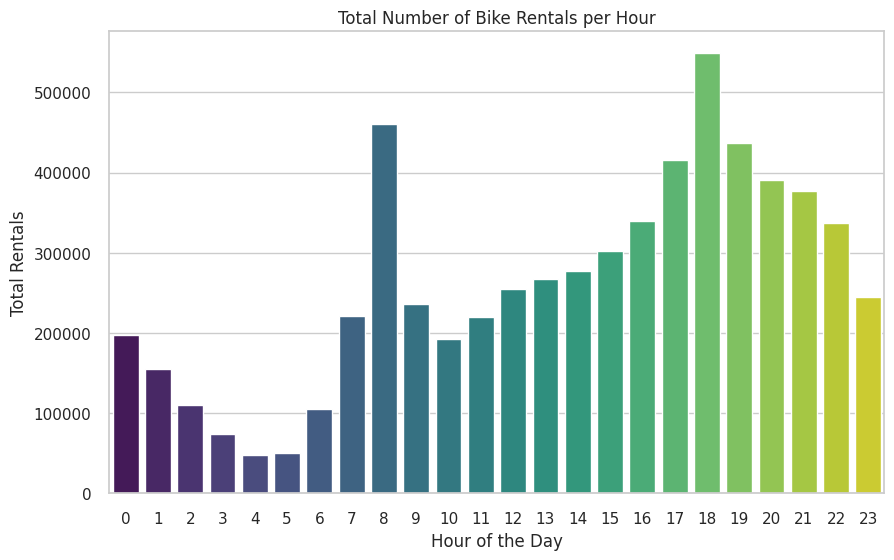

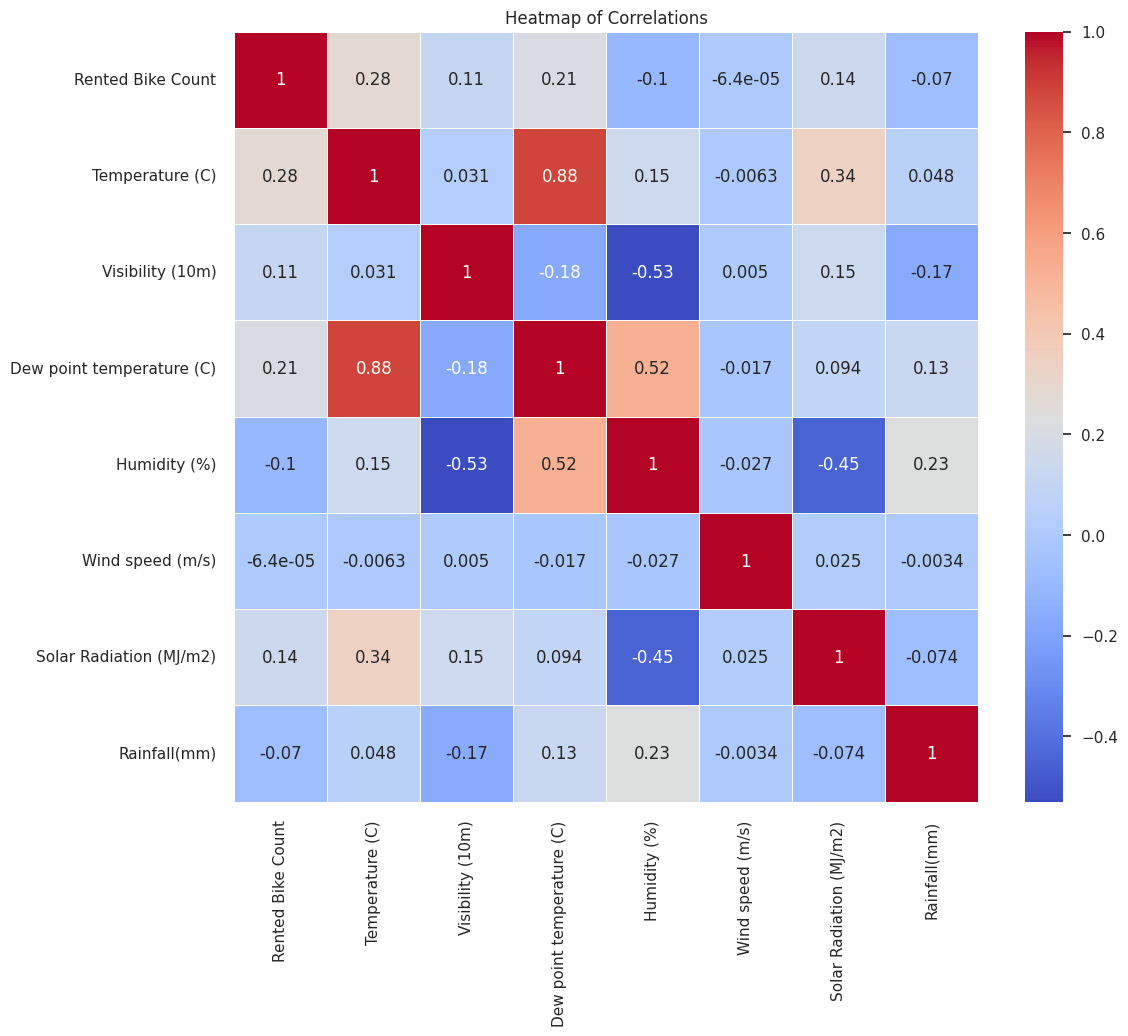

In [ ]:
### Your code here
#This has been added as the notebook is worked on Google Drive, don't need to do this if using Jupyter
from google.colab import drive
drive.mount('/content/drive')

#Import File Path
file_path = '/content/drive/MyDrive/SeoulBikeData.csv'
bike_data = pd.read_csv(file_path)

# Strip any leading/trailing whitespace characters from column names
bike_data.columns = bike_data.columns.str.strip()

# Ensure columns with potential non-numeric values are converted appropriately
bike_data['Rainfall(mm)'] = pd.to_numeric(bike_data['Rainfall(mm)'], errors='coerce')
bike_data['Solar Radiation (MJ/m2)'] = pd.to_numeric(bike_data['Solar Radiation (MJ/m2)'], errors='coerce')
bike_data['Snowfall (cm)'] = pd.to_numeric(bike_data['Snowfall (cm)'], errors='coerce')

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# List of features to plot
features = ['Rented Bike Count', 'Humidity (%)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)']

# List of features to plot histograms (excluding the ones already used for boxplots)
histogram_features = ['Temperature (C)', 'Visibility (10m)', 'Dew point temperature (C)']

# Plotting Histograms
for feature in histogram_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(bike_data[feature], bins=30, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

# Plotting Boxplots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=bike_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Plotting Countplot for Snowfall
plt.figure(figsize=(10, 6))
snowfall_binary = bike_data['Snowfall (cm)'].apply(lambda x: 'No Snowfall' if x == 0 else 'Snowfall')
sns.countplot(x=snowfall_binary, palette="viridis")
plt.xlabel('Snowfall')
plt.ylabel('Count')
plt.title('Countplot of Snowfall')
plt.show()

# Plotting Boxplot for Snowfall amounts (excluding zero snowfall)
plt.figure(figsize=(10, 6))
non_zero_snowfall = bike_data[bike_data['Snowfall (cm)'] > 0]
sns.boxplot(y=non_zero_snowfall['Snowfall (cm)'])
plt.title('Boxplot of Non-zero Snowfall (cm)')
plt.show()

# Aggregating data by hour to get the sum of rentals per hour (for HOUR column)
hourly_rentals = bike_data.groupby('Hour')['Rented Bike Count'].sum().reset_index()

# Plotting the total rentals per hour
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_rentals, palette="viridis")
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.title('Total Number of Bike Rentals per Hour')
# plt.show()

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting a heatmap to show the correlation between 'Rented Bike Count' and other features
plt.figure(figsize=(12, 10))
correlation_matrix = bike_data[['Rented Bike Count', 'Temperature (C)', 'Visibility (10m)',
                                'Dew point temperature (C)', 'Humidity (%)', 'Wind speed (m/s)',
                                'Solar Radiation (MJ/m2)', 'Rainfall(mm)']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [ ]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [ ]:
import datetime

# Create a copy of the data
data_copy = bike_data.copy()

# Strip any leading/trailing whitespace characters from column names
data_copy.columns = data_copy.columns.str.strip()

# Remove rows where the business is closed
data_copy = data_copy[data_copy['Functioning Day'] == 'Yes']
# Drop the Functioning Day column
data_copy = data_copy.drop(columns=['Functioning Day'])

# Convert seasons to one hot encoded format
data_copy = pd.get_dummies(data_copy, columns=['Seasons'], prefix='Season')

# Replace the Date feature with a binary Weekday feature
def date_is_weekday(datestring):
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]), int(dsplit[1]), int(dsplit[0])).weekday()
    return int(wday <= 4)

data_copy['Weekday'] = data_copy['Date'].apply(date_is_weekday)
data_copy = data_copy.drop(columns=['Date'])

# Convert remaining non-numerical features to numerical format or replace with NaN
data_copy['Holiday'] = data_copy['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

# Ensure columns with potential non-numeric values are converted appropriately
data_copy['Rainfall(mm)'] = pd.to_numeric(data_copy['Rainfall(mm)'], errors='coerce')
data_copy['Solar Radiation (MJ/m2)'] = pd.to_numeric(data_copy['Solar Radiation (MJ/m2)'], errors='coerce')
data_copy['Snowfall (cm)'] = pd.to_numeric(data_copy['Snowfall (cm)'], errors='coerce')

#Removing the outliers identified from the Visualizing plots
data_copy.loc[data_copy['Temperature (C)'] > 50, 'Temperature (C)'] = np.nan
data_copy.loc[data_copy['Wind speed (m/s)'] > 100, 'Wind speed (m/s)'] = np.nan
data_copy.loc[data_copy['Humidity (%)'] > 100, 'Humidity (%)'] = np.nan
data_copy.loc[data_copy['Rented Bike Count'] > 2000, 'Rented Bike Count'] = np.nan

# Save the cleaned data to a new CSV file
cleaned_data_file_path = '/content/drive/MyDrive/CleanedSeoulBikeData.csv'
data_copy.to_csv(cleaned_data_file_path, index=False)

# Load and display the cleaned data
df_updated = pd.read_csv(cleaned_data_file_path)
df_updated.head()


,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Weekday
0,254.0,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,0,False,False,False,True,1
1,204.0,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,0,False,False,False,True,1
2,173.0,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,0,False,False,False,True,1
3,107.0,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,0,False,False,False,True,1
4,78.0,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,0,False,False,False,True,1


## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data = df_updated

# Selecting numerical columns
numerical_columns = [
    'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
    'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
]

numerical_data = data[numerical_columns]

# Create a pipeline for imputation and scaling
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())                   # Standardize features by removing the mean and scaling to unit variance
])

# Fit and transform the numerical data using the pipeline
processed_data = pipeline.fit_transform(numerical_data)

# Convert processed data back to a DataFrame
processed_df = pd.DataFrame(processed_data, columns=numerical_columns)

# Combine with non-numerical columns
non_numerical_columns = data.drop(columns=numerical_columns)
final_processed_df = pd.concat([processed_df, non_numerical_columns.reset_index(drop=True)], axis=1)

# Save the processed DataFrame to a new CSV file
processed_file_path = '/content/drive/MyDrive/ProcessedSeoulBikeData.csv'
final_processed_df.to_csv(processed_file_path, index=False)

print(f"Processed data saved to {processed_file_path}")
final_processed_df.head()

Processed data saved to /content/drive/MyDrive/ProcessedSeoulBikeData.csv


,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Weekday
0,-0.738114,-1.662748,-1.484728,-1.031743,0.324320,0.929577,-1.627067,-0.653474,-0.132495,-0.076758,0,False,False,False,True,1
1,-0.838113,-1.518249,-1.509508,-0.982946,-0.657071,0.929577,-1.627067,-0.653474,-0.132495,-0.076758,0,False,False,False,True,1
2,-0.900112,-1.373751,-1.550809,-0.934148,-0.516872,0.929577,-1.634619,-0.653474,-0.132495,-0.076758,0,False,False,False,True,1
3,-1.032110,-1.229252,-1.567330,-0.885351,-0.586971,0.929577,-1.627067,-0.653474,-0.132495,-0.076758,0,False,False,False,True,1
4,-1.090109,-1.084754,-1.550809,-1.080541,0.394420,0.929577,-1.702586,-0.653474,-0.132495,-0.076758,0,False,False,False,True,1


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**.

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [ ]:
### Your code and outputs here

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = final_processed_df

# Separate the features and target variable
X = data.drop(columns=['Rented Bike Count'])
y = data['Rented Bike Count']

# Split the data into training and hold-out test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate the RMSE of the fit to the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate the RMSE for the baseline model where all predictions are the mean of the training targets
baseline_pred = np.full_like(y_train, y_train.mean())
rmse_baseline = np.sqrt(mean_squared_error(y_train, baseline_pred))

# Print the RMSE values
print(f'RMSE of the linear regression model on the training data: {rmse_train}')
print(f'RMSE of the baseline model: {rmse_baseline}')

RMSE of the linear regression model on the training data: 0.7206193223798003
RMSE of the baseline model: 0.9967346673337626


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [ ]:
### Your ChatGPT prompt
Give me the code to fit a linear regression and a Support Vector Regression model using 10-fold cross-validation for each model.
Then, I need to display the mean and standard deviation of the RMSE values for each model.
After that, perform hyper-parameter optimization on each model using GridSearch and display the mean
and standard deviation of the RMSE values for each model.
Choose the best model and visualize the results.
Please provide the complete code for this task, including any modifications needed to make it work, along with the outputs.

Linear Regression - Mean RMSE: 0.7225806994230048, Std RMSE: 0.01705631551047688
SVR - Mean RMSE: 0.6182237557975149, Std RMSE: 0.0132350205002251


<ipython-input-26-72fe9ff5e225>:56: RuntimeWarning: invalid value encountered in sqrt
  lr_best_rmse = np.sqrt(-lr_grid_search.best_score_)
<ipython-input-26-72fe9ff5e225>:64: RuntimeWarning: invalid value encountered in sqrt
  svr_best_rmse = np.sqrt(-svr_grid_search.best_score_)


Linear Regression (Optimized) - Best Params: {'regressor__fit_intercept': False, 'regressor__positive': True}, Best RMSE: nan
SVR (Optimized) - Best Params: {'regressor__C': 1, 'regressor__epsilon': 0.1, 'regressor__kernel': 'poly'}, Best RMSE: nan


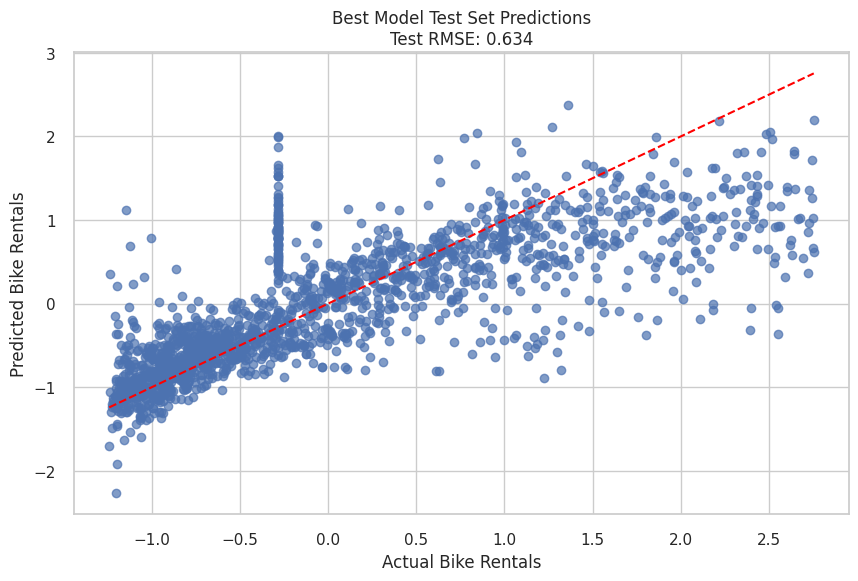

In [ ]:
### Code here (with outputs)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Load the data
# file_path = '/mnt/data/ProcessedSeoulBikeData.csv'
data = final_processed_df

# Separate the features and target variable
X = data.drop(columns=['Rented Bike Count'])
y = data['Rented Bike Count']

# Split the data into training and hold-out test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr_model = Pipeline([('regressor', LinearRegression())])
svr_model = Pipeline([('regressor', SVR())])

# Define a scorer for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform 10-fold cross-validation and calculate RMSE for Linear Regression
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring=rmse_scorer)
lr_mean_rmse = np.mean(lr_cv_scores)
lr_std_rmse = np.std(lr_cv_scores)

# Perform 10-fold cross-validation and calculate RMSE for SVR
svr_cv_scores = cross_val_score(svr_model, X_train, y_train, cv=10, scoring=rmse_scorer)
svr_mean_rmse = np.mean(svr_cv_scores)
svr_std_rmse = np.std(svr_cv_scores)

print(f'Linear Regression - Mean RMSE: {lr_mean_rmse}, Std RMSE: {lr_std_rmse}')
print(f'SVR - Mean RMSE: {svr_mean_rmse}, Std RMSE: {svr_std_rmse}')

# Define parameter grids for GridSearch
lr_param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

svr_param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['linear', 'poly', 'rbf']
}

# Initialize GridSearch for Linear Regression
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=10, scoring=rmse_scorer)
lr_grid_search.fit(X_train, y_train)

# Get best parameters and best score
lr_best_params = lr_grid_search.best_params_
lr_best_rmse = np.sqrt(-lr_grid_search.best_score_)

# Initialize GridSearch for SVR
svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=10, scoring=rmse_scorer)
svr_grid_search.fit(X_train, y_train)

# Get best parameters and best score
svr_best_params = svr_grid_search.best_params_
svr_best_rmse = np.sqrt(-svr_grid_search.best_score_)

print(f'Linear Regression (Optimized) - Best Params: {lr_best_params}, Best RMSE: {lr_best_rmse}')
print(f'SVR (Optimized) - Best Params: {svr_best_params}, Best RMSE: {svr_best_rmse}')

# Determine the best model
best_model = lr_grid_search if lr_best_rmse < svr_best_rmse else svr_grid_search

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title(f'Best Model Test Set Predictions\nTest RMSE: {test_rmse:.3f}')
plt.grid(True)
plt.show()

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [ ]:
### Your answer here (maximum of 200 words)

1. One improvement in the ChatGPT code is to include feature scaling for the Support Vector Regression model.
   We can include a StandardScaler in the pipeline for SVR to standardize the features before fitting the model. Proper scaling may improve the model.

2. ChatGPT does not always give the appropriate response,
   for example, it went on a loop of suggesting the same ways to handle 'nan' values in the data set.
   I eventually had to study the ways to convert the nan values to median instead of dropping them.

3. 'RuntimeWarning' related to invalid values encountered in the sqrt function, this was encountered as ChatGPT gave the code using 'mean_squared_error'
   instead of 'neg_mean_squared_error'.

SyntaxError: invalid syntax (<ipython-input-4-e328f8f5a344>, line 3)